### Numpy Image processing 

###### https://www.kaggle.com/code/namanj27/numpy-image-processing-tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

c:\Program Files\Python312\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
img = Image.open("photo_2023-07-04_23-10-13.jpg")

In [4]:
img = np.array(img)

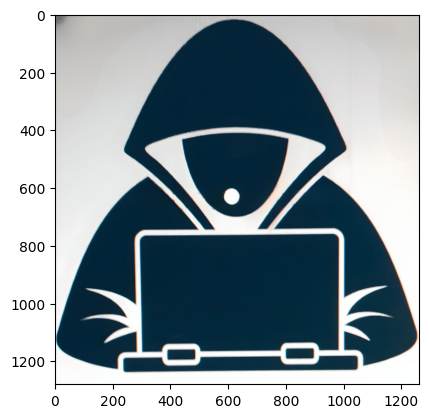

In [6]:
plt.imshow(img)

In [7]:
print(img.shape)
print(img.dtype)
print(img.ndim)
print(img.size)

(1280, 1262, 3)
uint8
3
4846080


In [8]:
img[1,1]

array([122, 128, 116], dtype=uint8)

#### Saving ndarray as Image :-

In [9]:
path = 'emma.jpg'
pil_img = Image.fromarray(img)
pil_img.save(path)

####  Rotate image :-

Text(0.5, 1.0, 'rotated')

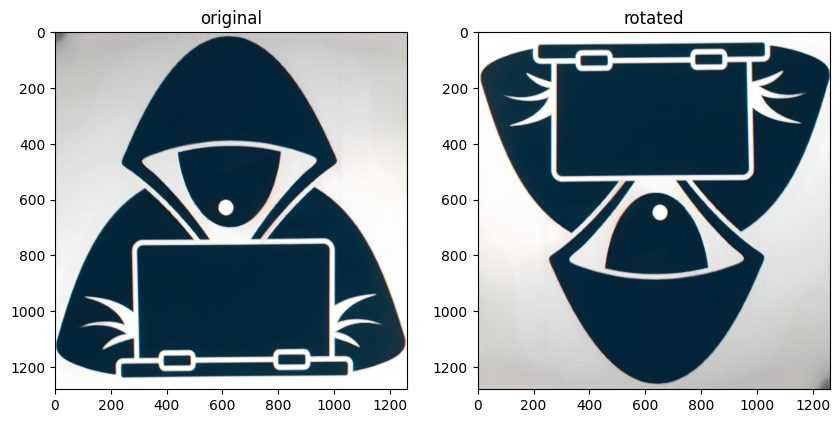

In [14]:
degrees = 180
fig = plt.figure(figsize=(10, 10))


fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")


img0 = img.copy()
# Algo: image(ndarray) -> transpose -> mirror image across y axis (middle column)

for _ in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    
    for j in range(0, img0.shape[1] // 2):

        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
        
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title("rotated")

In [12]:
img0 = np.rot90(img)

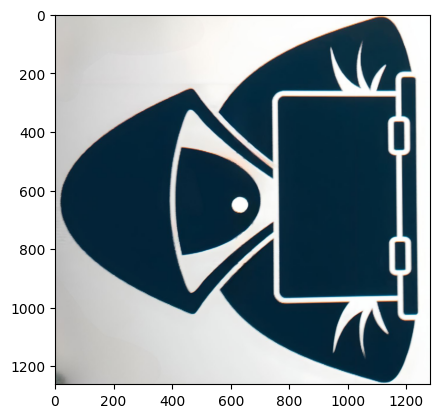

In [13]:
plt.imshow(img0)

#### Negative of an image :-

In [16]:
img_grey = img.sum(2) / (255*3) # summing over axis=2 (channel axis) to get grey scaled image

Text(0.5, 1.0, 'Negative of RGB image')

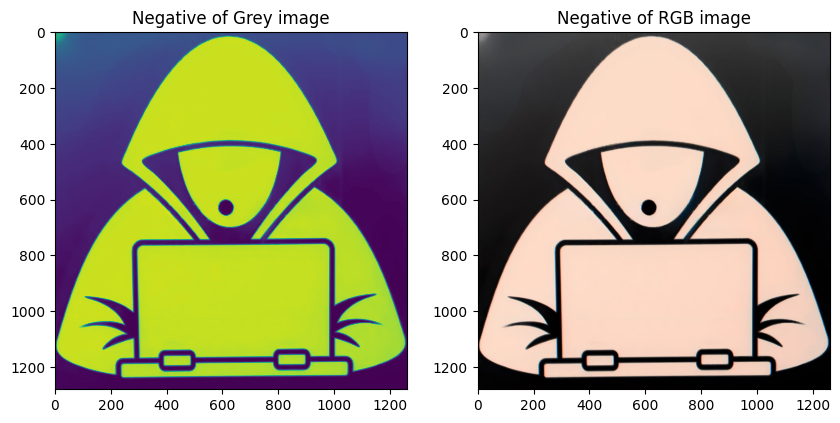

In [17]:
fig = plt.figure(figsize=(10, 10))
img_grey = 255*3 - img_grey        # 255 * 3 because we added along channel axis previously
fig.add_subplot(1, 2, 1)
plt.imshow(img_grey)
plt.title('Negative of Grey image')

img = 255 - img
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title('Negative of RGB image')

#### Padding black spaces :-

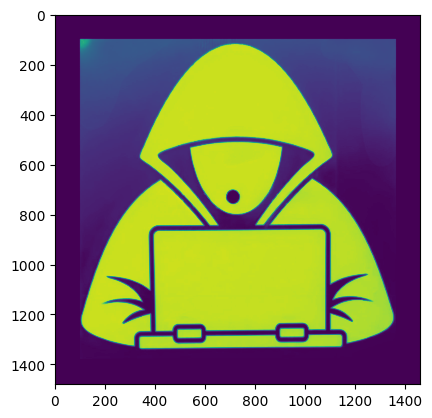

In [20]:
img_grey = img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((100,100),(100,100)), mode='constant')
plt.imshow(img0)

#### See RGB IMAGE

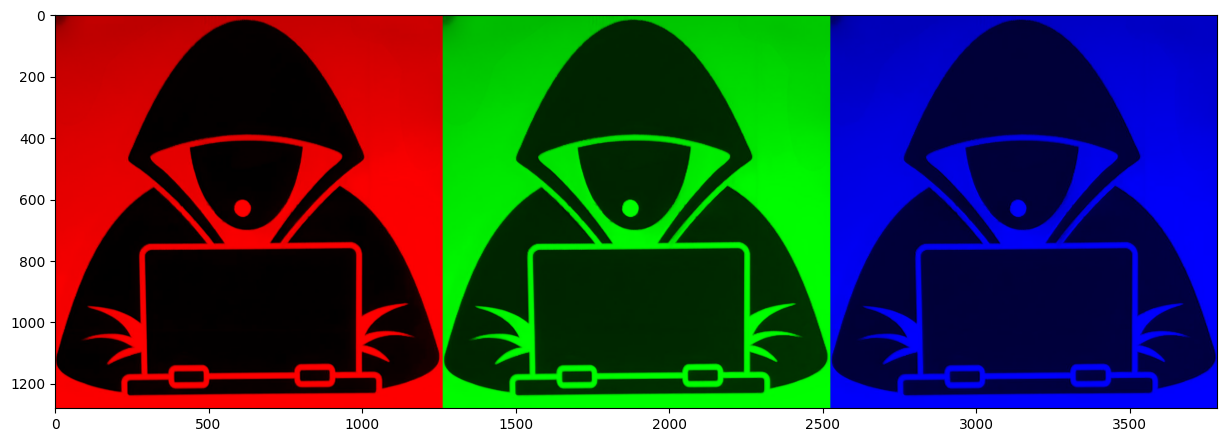

In [26]:
img = np.array(Image.open("photo_2023-07-04_23-10-13.jpg"))

img_R, img_G, img_B = img.copy(), img.copy(), img.copy()

img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0



img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

#### Color Reduction :-

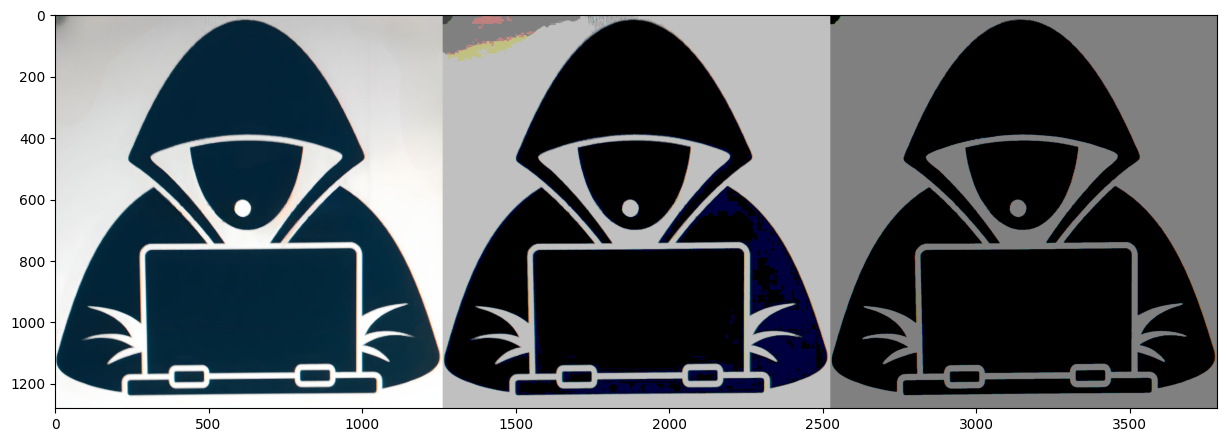

In [27]:
img_0 = (img // 64) * 64    
img_1 = (img // 128) * 128

img_all = np.concatenate((img, img_0, img_1), axis=1)

plt.figure(figsize=(15, 15))
plt.imshow(img_all)

#### Trim Image by array slicing :-

Text(0.5, 1.0, 'Trimmed')

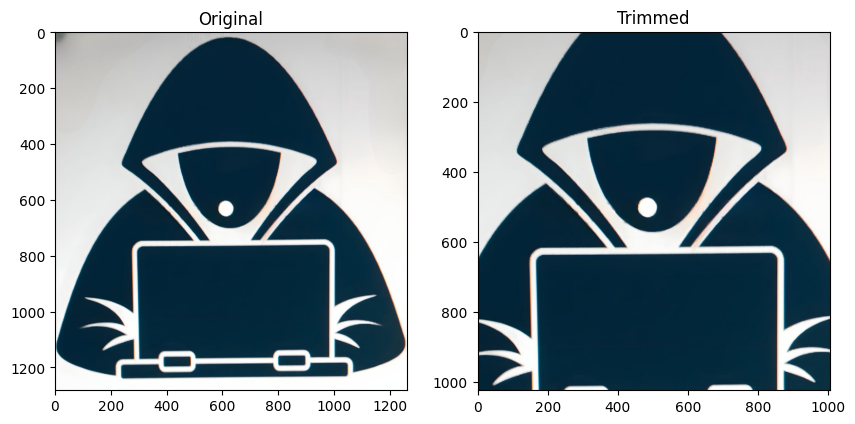

In [28]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

img0 = img[128:-128, 128:-128, :]

fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')

#### Image Rotation :-

Text(0.5, 1.0, 'Flip_rotated')

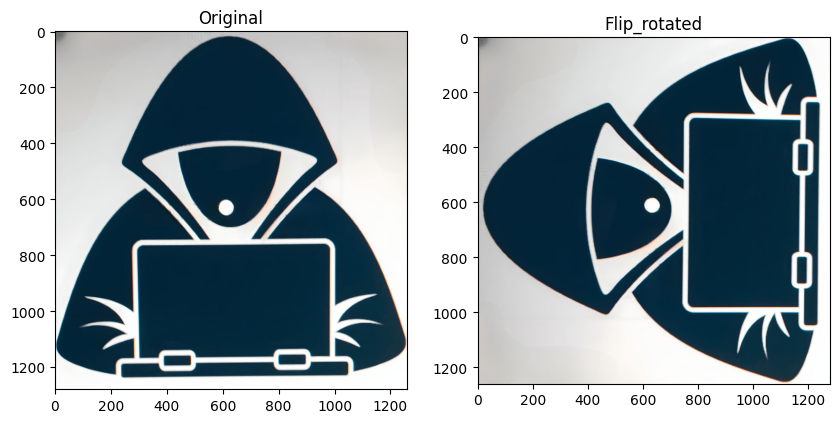

In [41]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

img0 = img.transpose(1, 0, 2)

fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Flip_rotated')

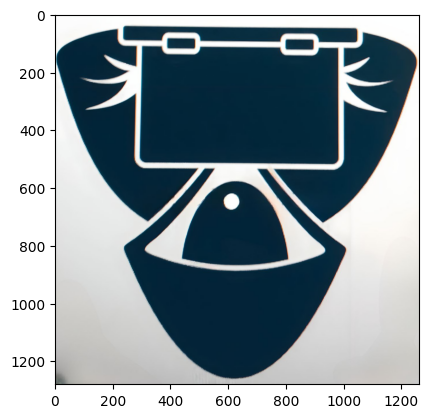

In [42]:
img0 = img.copy()

for i in range(img0.shape[0] // 2):
    c = img0[i, :, :].copy()
    img0[i, :, :] = img0[img0.shape[0] - i - 1, :, :]
    img0[img0.shape[0] - i - 1, :, :] = c
        
plt.imshow(img0)

#### Binarize image :-

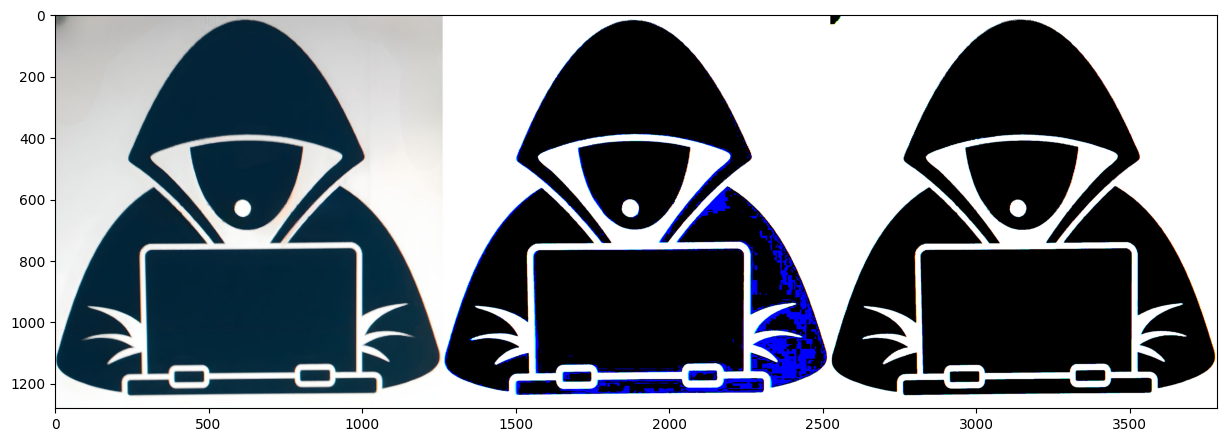

In [32]:
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255

fig = plt.figure(figsize=(15, 15))

img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

#### Masking images:-

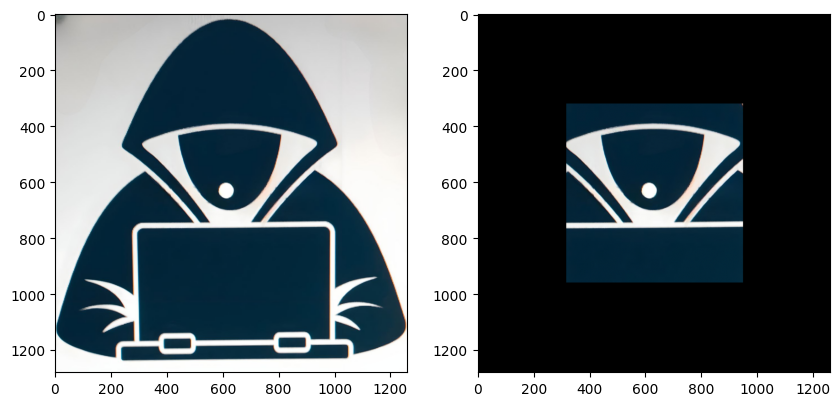

In [40]:
img = np.array(Image.open("photo_2023-07-04_23-10-13.jpg"))

# Create ones and zeros matrices
ones = np.ones((img.shape[0] // 2, img.shape[1] // 2, 3))
zeros = np.zeros((img.shape[0] // 4, img.shape[1] // 4, 3))

# Zeros in the middle
zeros_mid = np.zeros((img.shape[0] // 2, img.shape[1] // 4, 3))

# Concatenate for up and down
up = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
down = np.concatenate((zeros, zeros, zeros, zeros), axis=1)

# Check the width of middle and adjust
middle = np.concatenate((zeros_mid, ones, zeros_mid), axis=1)

# Trim the middle array to match the width of 'up' and 'down'
if middle.shape[1] > up.shape[1]:
    middle = middle[:, :up.shape[1], :]

# Now all arrays have the same width, we can concatenate vertically
mask = np.concatenate((up, middle, down), axis=0)

# Normalize the mask
mask = mask / 255

# Ensure the image has the same width as the mask by trimming it
if img.shape[1] > mask.shape[1]:
    img = img[:, :mask.shape[1], :]

# Apply mask to the image
img0 = mask * img

# Plot original and masked images
fig = plt.figure(figsize=(10, 10))

# Show original image
fig.add_subplot(1, 2, 1)
plt.imshow(img)

# Show masked image
fig.add_subplot(1, 2, 2)
plt.imshow(img0)

plt.show()


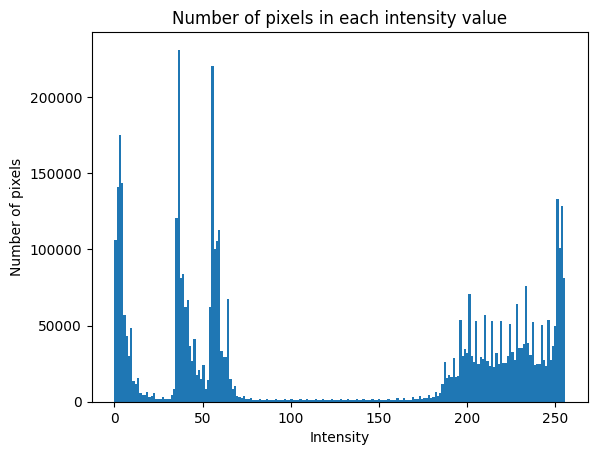

In [45]:
img_flat = img.flatten()

plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()